In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
import numpy as np

def modified_GC_random_sample(log_Mstellar, n):
    if n % 2 != 0:
        raise ValueError("num_samples must be even for exact 50/50 split.")
    
    # Mean and scatter for log-normal distribution
    Mstellar = 10**log_Mstellar
    mean_log_MGC = np.log10(0.01 * Mstellar)  # Mean in log space
    sigma = 0.5  # dex
    
    # Generate log-normal samples
    MGC_samples = 10**np.random.normal(mean_log_MGC, sigma, n)
    MNSC_samples = 10**np.random.normal(mean_log_MGC, sigma, n)

    # 50/50 split for NSC presence
    half = n // 2
    samples = np.array([0] * half + [1] * half)
    np.random.shuffle(samples)
    
    # Combine GC and NSC samples
    MGCs = []
    for i in range(n):
        if samples[i] == 1:  # Galaxy has an NSC
            MGC = MGC_samples[i] + MNSC_samples[i]
        else:  # Galaxy without NSC
            MGC = MGC_samples[i]
        
        MGCs.append(MGC)

    return [np.array(MGC_samples), np.array(MNSC_samples), np.array(MGCs)]

In [46]:
# Print a few samples
# Example usage
log_Mstellar = 8  # Log stellar mass
sample = modified_GC_random_sample(log_Mstellar, 20)
MGC_samples, MNSC_samples, MGCs = sample
print(np.log10(MGCs))
# print((MGC_samples)/10**5)
# print((MGC_samples)/10**5)
# print((MNSC_samples)/10**5)

[7.06816474 6.4258018  6.09606072 5.98861784 6.89264203 6.26805178
 6.95446883 6.30970818 5.89383614 6.56976378 6.15218103 5.88303341
 6.20804448 5.94981577 6.27430531 5.57450796 5.75803682 6.66295025
 4.68882255 6.11954183]


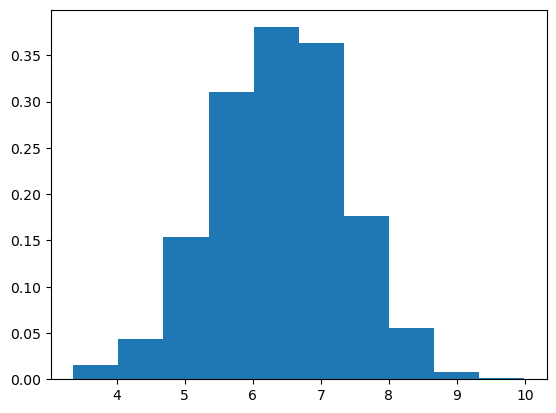

In [41]:
sample = modified_GC_random_sample(log_Mstellar, 1000)
MGC_samples, MNSC_samples, MGCs = sample
plt.hist(np.log10(MGCs), density = True)
plt.show()

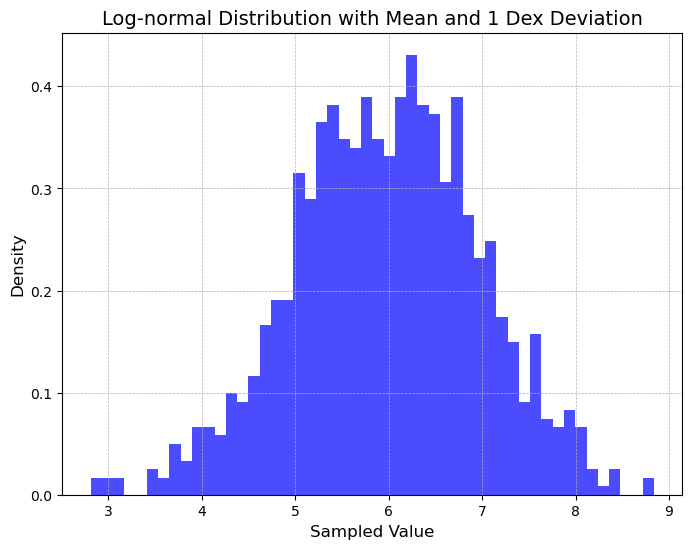

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the log-normal distribution
log_mean = np.log10(0.01 * 10**8)  # Logarithmic mean (e.g., log(Mstellar))
log_deviation = 1  # 1 dex deviation in log space

# Generate a sample from the log-normal distribution
n = 1000 # Number of samples
samples = np.random.normal(log_mean, log_deviation, size=n)

# Plot the distribution
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=50, density=True, alpha=0.7, color='blue')
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel("Sampled Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Log-normal Distribution with Mean and 1 Dex Deviation", fontsize=14)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()
